In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from skimage.feature import hog
from sklearn import tree
#...

## Loading the datasets

In [2]:
# Loading the main dataset and print it
dataset = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [4]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


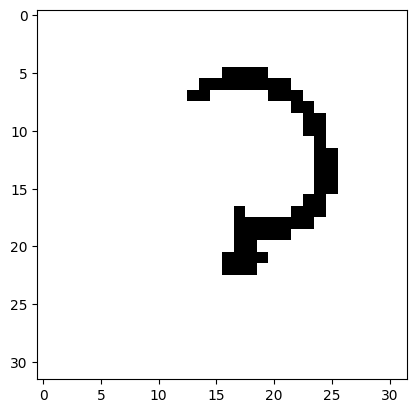

In [5]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

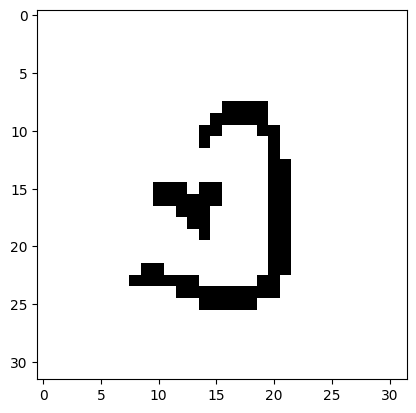

In [6]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [7]:
import random
pred = random.choices(np.unique(dataset.label), k=500)
pred
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

[16,
 2,
 2,
 18,
 6,
 18,
 12,
 1,
 16,
 16,
 22,
 22,
 16,
 1,
 2,
 16,
 18,
 12,
 12,
 22,
 22,
 2,
 18,
 6,
 1,
 1,
 22,
 16,
 12,
 12,
 2,
 6,
 2,
 6,
 22,
 16,
 18,
 1,
 2,
 18,
 1,
 2,
 6,
 18,
 2,
 1,
 18,
 18,
 2,
 12,
 2,
 12,
 6,
 12,
 22,
 22,
 18,
 6,
 18,
 6,
 22,
 6,
 16,
 18,
 18,
 6,
 1,
 6,
 12,
 22,
 22,
 6,
 1,
 18,
 22,
 2,
 18,
 16,
 16,
 18,
 18,
 6,
 22,
 18,
 16,
 1,
 2,
 22,
 1,
 16,
 1,
 18,
 1,
 6,
 2,
 1,
 12,
 16,
 22,
 12,
 12,
 18,
 12,
 16,
 16,
 6,
 12,
 6,
 2,
 16,
 22,
 6,
 16,
 22,
 12,
 2,
 1,
 18,
 18,
 16,
 2,
 16,
 18,
 12,
 1,
 22,
 18,
 18,
 18,
 1,
 18,
 1,
 18,
 6,
 18,
 12,
 2,
 2,
 1,
 2,
 22,
 6,
 1,
 6,
 2,
 16,
 2,
 16,
 22,
 1,
 1,
 18,
 1,
 22,
 6,
 6,
 6,
 16,
 16,
 16,
 2,
 18,
 22,
 22,
 16,
 18,
 18,
 6,
 6,
 6,
 16,
 2,
 18,
 1,
 1,
 22,
 18,
 22,
 12,
 2,
 16,
 12,
 12,
 12,
 18,
 22,
 12,
 18,
 6,
 6,
 6,
 2,
 18,
 2,
 22,
 16,
 16,
 12,
 6,
 2,
 2,
 2,
 1,
 16,
 1,
 12,
 18,
 12,
 16,
 18,
 16,
 2,
 6,
 12,
 1,
 6,
 12,
 1,
 1

In [8]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,16
1,2,2
2,3,2
3,4,18
4,5,6
...,...,...
495,496,16
496,497,2
497,498,18
498,499,18


## Part 1 : preliminar analysis of the dataset

### Analyse univariée patrtielle

In [9]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 1 to 1700
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 13.3 MB


##### Commentaire 1
On constate ici que nous avons 1700 entrées, une variable cible "label" et 1024 descripteurs". 

In [10]:
print(dataset['label'].value_counts(normalize=True))
print(dataset['label'].value_counts(normalize=False))

label
12    0.150000
6     0.147059
22    0.144118
18    0.141765
1     0.140000
2     0.140000
16    0.137059
Name: proportion, dtype: float64
label
12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: count, dtype: int64


##### Commentaire 2
Notre variable cible "label" est subdivisé en 7 classes

In [11]:
dataset.isnull().sum()

label        0
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel1020    0
pixel1021    0
pixel1022    0
pixel1023    0
pixel1024    0
Length: 1025, dtype: int64

In [12]:
#description description des données
dataset.describe(include=('all'))# De la 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,1700.000000,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,...,1700.0,1700.000000,1700.0,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,11.017647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001176,0.0,0.001765,0.002941,0.001176,0.000588,0.001176,0.002353,0.002353
std,7.550554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.034290,0.0,0.041984,0.054169,0.034290,0.024254,0.034290,0.048464,0.048464
min,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Commentaire 3
Nous n'avons pas de valeur nulle

## Part 2 : classifiers based on raw images

## Train / Valid / Test split

In [13]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
248,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1507,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1291,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Decision trees

### Initialisation de l'arbre de decision

In [14]:
# The basic decision tree can be obtained easily by this command
arbre = tree.DecisionTreeClassifier().fit(data_train.iloc[:,1:],data_train.label)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)

### Un aperçu de la perfomances de l'arbre

In [414]:
perf_sur_train= arbre.score(data_train.iloc[:,1:],data_train.label)
perf_sur_val= arbre.score(data_valid.iloc[:,1:],data_valid.label)
perf_sur_test= arbre.score(data_test.iloc[:,1:],data_test.label)

print("Sur le data_train "+ str(perf_sur_train))
print("Sur le data_valid "+ str(perf_sur_val))
print("Sur le data_test "+ str(perf_sur_test))


Sur le data_train 1.0
Sur le data_valid 0.5176470588235295
Sur le data_test 0.5098039215686274


### Nous allons maintenant procéder à l'élagage de l'arbre ainsi créé afin de trouver un arbre qui maximise la perfomance sur les données de test

## Etape 1 (arbre): Calculer le alphas

In [16]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.00078031, 0.00078782, 0.00080032, 0.00081487,
        0.00081822, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00084034, 0.00084034, 0.00084034, 0.00084034, 0.00084034,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.00112045, 0.00112045, 0.00112045,
        0.00112045, 0.00112045, 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 ,
        0.0012605 , 0.0012605 , 0.0012605 , 0.0012605 , 0.00130719,
        0.00130719, 0.00131702, 0.

In [17]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

## Etape 2 (arbre): Trouver le meilleur niveau délagage/ le meilleur arbre

Pour ce faire j'ai écrit la fonction best_tree() qui prend en parmettre les données d'apprentissages et de validations ainsi que la variable cible, les différentes limites pour les descripteurs. Elle nous renvoie tableau (contenant les alphas, les scores sur le train et les validations) et le meilleur arbre(celui avec la meilleur perfomance en validation)

In [415]:
def best_tree(data_train,data_valid,Y,deb,limit):
    result=pd.DataFrame()
    ccp_alphas_train = []
    score_train = []
    score_valid = []

    for i in range (len(ccp_alphas)):
        dt_pruned_train = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[i]).fit(data_train.iloc[:,deb:limit], data_train[Y])
        ccp=path.ccp_alphas[i]
        data_train.columns = data_train.columns.astype(str)
        data_valid.columns = data_valid.columns.astype(str)
        score_t=dt_pruned_train.score(data_train.iloc[:,deb:limit], data_train[Y])
        score_v=dt_pruned_train.score(data_valid.iloc[:,deb:limit], data_valid[Y])
        ccp_alphas_train.append(ccp) 
        score_train.append(score_t)
        score_valid.append(score_v)
    
    result['ccp_alpha']= ccp_alphas_train
    result['score_train']= score_train 
    result['score_valid']= score_valid
    best_index = result['score_valid'].idxmax()
    print(best_index)
    best_tree=dt_pruned_train = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[best_index]).fit(data_train.iloc[:,deb:limit], data_train[Y])
    return result,best_tree




In [416]:
apperçu=best_tree(data_train,data_valid,'label',1,data_train.shape[1])
meilleur_arbre_elague=apperçu[1]
apperçu

1


(     ccp_alpha  score_train  score_valid
 0     0.000000     1.000000     0.494118
 1     0.000796     0.998319     0.541176
 2     0.000818     0.996639     0.525490
 3     0.000828     0.995798     0.529412
 4     0.000830     0.995798     0.513725
 ..         ...          ...          ...
 157   0.038381     0.154622     0.121569
 158   0.045008     0.154622     0.121569
 159   0.048858     0.154622     0.121569
 160   0.052628     0.154622     0.121569
 161   0.081649     0.154622     0.121569
 
 [162 rows x 3 columns],
 DecisionTreeClassifier(ccp_alpha=0.0007961079168509513))

## Etape 3 (arbre): Calculer l'estimation de l'erreur de généralisation de l'arbre choisi

In [417]:
err_gen_arbre= 1-meilleur_arbre_elague.score(data_test.iloc[:,1:data_train.shape[1]], data_test['label'])
err_gen_arbre

0.4901960784313726

### Commentaire

Nous avons une estimation de l'erreur de généralisation (plutôt forte) de 47,8% 

## Prédiction

### SVM

## Etape 1(SVM): Initialisation du modèle

In [20]:
from sklearn import svm

### Avec toutes les données

In [21]:
model_svm1 = svm.SVC(C = 1000, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1000

model_svm1.fit(dataset.iloc[:,1:], dataset.label)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1000, kernel='linear')

### Avec les données d'apprentissage

In [22]:
model_svm = svm.SVC(C = 1, kernel = 'linear').fit(data_train.iloc[:, 1:1024], data_train.label)
# The parameter C is set to 1

In [23]:
score_train_svm = model_svm.score(data_train.iloc[:, 1:1024], data_train.label)
score_valid_svm = model_svm.score(data_valid.iloc[:, 1:1024], data_valid.label)
score_test_svm = model_svm.score(data_valid.iloc[:, 1:1024], data_valid.label)
print("Le score train = "+str(score_train_svm))
print("Le score valid = "+str(score_valid_svm))
print("Le score test = " + str(score_test_svm))

Le score train = 1.0
Le score valid = 0.6784313725490196
Le score test = 0.6784313725490196


## Etape 2 (SVM): Trouver le meilleur C

In [24]:
  
c_list=[0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]
def svm_model(data_train, data_valid, kernel):
    result = pd.DataFrame()
    mod = []
    score_train_svm = []
    score_valid_svm = []
    for i in c_list:
        model = svm.SVC(C=i, kernel=kernel).fit(data_train.iloc[:, 1:1025], data_train.label)
        mod.append(model)
        score_t = model.score(data_train.iloc[:, 1:1025], data_train.label)
        score_v = model.score(data_valid.iloc[:, 1:1025], data_valid.label)
        score_train_svm.append(score_t)
        score_valid_svm.append(score_v)
    result['score_train'] = score_train_svm
    result['score_validation'] = score_valid_svm
    result['model'] = mod
    best_index = result['score_validation'].idxmax()
    return result, result['model'][best_index]


In [25]:
  
c_list=[0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]
def svm_model_no_lin(data_train, data_valid, kernel, gamma=None):
    result = pd.DataFrame()
    mod = []
    score_train_svm = []
    score_valid_svm = []
    for i in c_list:
        model = svm.SVC(C=i, kernel=kernel, gamma=gamma).fit(data_train.iloc[:, 1:1025], data_train.label)
        mod.append(model)
        score_t = model.score(data_train.iloc[:, 1:1025], data_train.label)
        score_v = model.score(data_valid.iloc[:, 1:1025], data_valid.label)
        score_train_svm.append(score_t)
        score_valid_svm.append(score_v)
    result['score_train'] = score_train_svm
    result['score_validation'] = score_valid_svm
    result['model'] = mod
    best_index = result['score_validation'].idxmax()
    return result, result['model'][best_index]


In [419]:
res=svm_model(data_train,data_valid,'linear')
err_gen_svm_linear = 1-res[1].score(data_test.iloc[:, 1:1025], data_test.label)
err_gen_svm_linear

0.2313725490196078

## Non_lineraire

In [27]:
G= [0.01, 0.1, 1, 5]
gaussien=svm_model_no_lin(data_train,data_valid,'rbf','scale')
gaussien

(   score_train  score_validation        model
 0     0.154622          0.121569  SVC(C=0.01)
 1     0.221008          0.160784  SVC(C=0.05)
 2     0.974790          0.792157     SVC(C=1)
 3     1.000000          0.819608     SVC(C=5)
 4     1.000000          0.819608    SVC(C=10)
 5     1.000000          0.819608    SVC(C=50)
 6     1.000000          0.819608   SVC(C=100)
 7     1.000000          0.819608   SVC(C=500)
 8     1.000000          0.819608  SVC(C=1000),
 SVC(C=5))

In [28]:
#model = svm.SVC(C=6, kernel='rbf').fit(data_train.iloc[:, 1:1025], data_train.label)
err_gen_svm_rbf = 1-gaussien[1].score(data_test.iloc[:, 1:1025], data_test.label)
err_gen_svm_rbf

0.14901960784313728

In [421]:
test_poly=svm_model(data_train,data_valid,'poly')
model_poly=test_poly[1]
test_poly

(   score_train  score_validation                       model
 0     0.154622          0.121569  SVC(C=0.01, kernel='poly')
 1     0.195798          0.149020  SVC(C=0.05, kernel='poly')
 2     0.959664          0.709804     SVC(C=1, kernel='poly')
 3     0.997479          0.768627     SVC(C=5, kernel='poly')
 4     1.000000          0.772549    SVC(C=10, kernel='poly')
 5     1.000000          0.776471    SVC(C=50, kernel='poly')
 6     1.000000          0.776471   SVC(C=100, kernel='poly')
 7     1.000000          0.776471   SVC(C=500, kernel='poly')
 8     1.000000          0.776471  SVC(C=1000, kernel='poly'),
 SVC(C=50, kernel='poly'))

In [422]:
err_gen_svm_poly = 1-model_poly.score(data_test.iloc[:, 1:1025], data_test.label)
err_gen_svm_poly

0.2196078431372549

### Commentaire

L'erreur de généralisation la plus faible est celle du SVM avec en paramètre C=5 et de noyau gaussien

### K-nearest-neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier

## Etape 1(knn): Initialisation 

In [32]:
n_n = KNeighborsClassifier(n_neighbors=1) # this initializes a knn for k = 1
n_n.fit(data_train.iloc[:,1:],data_train.label)
# here we fit this knn by giving the features of all the
# examples of the training set (columns 1 to last) and their labels

KNeighborsClassifier(n_neighbors=1)

### Un aperçu des perfomances

In [33]:
perf_sur_train= n_n.score(data_train.iloc[:,1:],data_train.label)
perf_sur_val= n_n.score(data_valid.iloc[:,1:],data_valid.label)
perf_sur_test= n_n.score(data_test.iloc[:,1:],data_test.label)

print("Sur le data_train "+ str(perf_sur_train))
print("Sur le data_valid "+ str(perf_sur_val))
print("Sur le data_test "+ str(perf_sur_test))

Sur le data_train 1.0
Sur le data_valid 0.7490196078431373
Sur le data_test 0.7294117647058823


## Etape 2 (knn):  Trouver le nombre de vosins optimal pour prédire les données de test

Pour ce faire j'ai écrit la fonction knn() qui prend en paramètre les données d'apprentissages et de validations ainsi que la variable cible, les différentes limites pour les descripteurs. Elle nous renvoie tableau (les scores sur les validations, ainsi que les modèles qui y sont associés) et le meilleur modèle(celui avec la meilleur perfomance en validation)

In [423]:
def knn(mnist_train,mnist_valid,Y,deb,fin):
    result= pd.DataFrame()
    neighbour=[]
    score=[]
    for i in range (1,100):
        mnist_train.columns = mnist_train.columns.astype(str)
        mnist_valid.columns = mnist_valid.columns.astype(str)
        n_n = KNeighborsClassifier(n_neighbors=i)
        neighbour.append(n_n.fit(mnist_train.iloc[:,deb:fin],mnist_train[Y]))
        n_n_score_valid=n_n.score(mnist_valid.iloc[:,deb:fin], mnist_valid[Y])
        score.append(n_n_score_valid)

    result['score validation']= score
    result['neighbour']= neighbour
    best_index = result['score validation'].idxmax()
    best_neighbour= result['neighbour'][best_index]
    knn_final=best_neighbour.fit(mnist_train.iloc[:,deb:fin],mnist_train.label)
    return result,knn_final

test=knn(data_train,data_valid,'label',1,data_train.shape[1])
test

(    score validation                             neighbour
 0           0.749020   KNeighborsClassifier(n_neighbors=1)
 1           0.647059   KNeighborsClassifier(n_neighbors=2)
 2           0.682353   KNeighborsClassifier(n_neighbors=3)
 3           0.650980   KNeighborsClassifier(n_neighbors=4)
 4           0.666667                KNeighborsClassifier()
 ..               ...                                   ...
 94          0.407843  KNeighborsClassifier(n_neighbors=95)
 95          0.400000  KNeighborsClassifier(n_neighbors=96)
 96          0.400000  KNeighborsClassifier(n_neighbors=97)
 97          0.396078  KNeighborsClassifier(n_neighbors=98)
 98          0.400000  KNeighborsClassifier(n_neighbors=99)
 
 [99 rows x 2 columns],
 KNeighborsClassifier(n_neighbors=1))

## Etape 3 (knn)= Calculer l'erreur de généralisation du modèle choisi

In [424]:
err_gen_arbre= 1-test[1].score(data_test.iloc[:,1:data_train.shape[1]], data_test['label'])
err_gen_arbre

0.2705882352941177

### Commentaire

Nous avons une estimation de l'erreur de généralisation pour les l'agorithme des knn 27%. Cette erreur est meilleure que l'erreur de généralisation des arbres 

## Recalculer le modèle en excluant le 1-ppv

In [36]:
def knn_more_tran_1(mnist_train,mnist_valid,Y,deb,fin):
    result= pd.DataFrame()
    neighbour=[]
    score=[]
    for i in range (2,100):
        mnist_train.columns = mnist_train.columns.astype(str)
        mnist_valid.columns = mnist_valid.columns.astype(str)
        n_n = KNeighborsClassifier(n_neighbors=i)
        neighbour.append(n_n.fit(mnist_train.iloc[:,deb:fin],mnist_train[Y]))
        n_n_score_valid=n_n.score(mnist_valid.iloc[:,deb:fin], mnist_valid[Y])
        score.append(n_n_score_valid)

    result['score validation']= score
    result['neighbour']= neighbour
    best_index = result['score validation'].idxmax()
    best_neighbour= result['neighbour'][best_index]
    knn_final=best_neighbour.fit(mnist_train.iloc[:,deb:fin],mnist_train.label)
    return result,knn_final

In [37]:
knn_sans_1ppv=knn_more_tran_1(data_train,data_valid,'label',1,data_train.shape[1])
knn_sans_1ppv

(    score validation                             neighbour
 0           0.647059   KNeighborsClassifier(n_neighbors=2)
 1           0.682353   KNeighborsClassifier(n_neighbors=3)
 2           0.650980   KNeighborsClassifier(n_neighbors=4)
 3           0.666667                KNeighborsClassifier()
 4           0.639216   KNeighborsClassifier(n_neighbors=6)
 ..               ...                                   ...
 93          0.407843  KNeighborsClassifier(n_neighbors=95)
 94          0.400000  KNeighborsClassifier(n_neighbors=96)
 95          0.400000  KNeighborsClassifier(n_neighbors=97)
 96          0.396078  KNeighborsClassifier(n_neighbors=98)
 97          0.400000  KNeighborsClassifier(n_neighbors=99)
 
 [98 rows x 2 columns],
 KNeighborsClassifier(n_neighbors=3))

In [38]:
err_gen_arbre= 1-knn_sans_1ppv[1].score(data_test.iloc[:,1:data_train.shape[1]], data_test['label'])
err_gen_arbre

0.3019607843137255

## Prédiction avec 1-ppv

## Prédiction sans 1-ppv

### Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

## Etape 1: Initiliation

In [40]:
r_f = RandomForestClassifier(n_estimators=10) # this initializes a random forest with 10 trees
r_f.fit(data_train.iloc[:,1:],data_train.label) 
# here we fit this random forest by giving the features of all the
# examples of the training set (columns 1 to last) and their labels

RandomForestClassifier(n_estimators=10)

In [41]:
r_f_score_train=r_f.score(data_train.iloc[:,1:data_train.shape[1]], data_train.label)
r_f_score_valid=r_f.score(data_valid.iloc[:,1:data_valid.shape[1]], data_valid.label)

r_f_score_train
r_f_score_valid

0.6509803921568628

## Etape 2: Trouver le meilleur nombre d'arbre

In [42]:
def forest(mnist_train,mnist_valid,Y,deb):
    result= pd.DataFrame()
    tree=[]
    score=[]
    for i in range (1,100):
        mnist_train.columns = mnist_train.columns.astype(str)
        mnist_valid.columns = mnist_valid.columns.astype(str)
        r_f = RandomForestClassifier(n_estimators=i) # this initializes a random forest
        tree.append(r_f.fit(mnist_train.iloc[:,deb:],mnist_train[Y]))
        r_f_score_valid=r_f.score(mnist_valid.iloc[:,deb:mnist_valid.shape[1]], mnist_valid[Y])
        score.append(r_f_score_valid)

    result['score']= score
    result['tree']= tree
    best_index = result['score'].idxmax()
    best_forest = RandomForestClassifier(n_estimators=best_index)
    forest=best_forest.fit(mnist_train.iloc[:,deb:],mnist_train.label)
    return result,forest

In [43]:
result=forest(data_train,data_valid,'label',1)[1]
result

RandomForestClassifier(n_estimators=79)

In [44]:
best_forest_error=1-result.score(data_test.iloc[:,1:data_test.shape[1]], data_test.label)
best_forest_error

0.19215686274509802

### Logistic regression

### Regression logistique simple

In [45]:
lr_model = LogisticRegression().fit(data_train.iloc[:,1:], data_train.label)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
best_lr_error=1-lr_model.score(data_test.iloc[:,1:data_test.shape[1]], data_test.label)
best_lr_error

0.29803921568627456

### Regression multinomial 

In [47]:
poly = PolynomialFeatures(degree = 2) 
X2_train_poly = pd.DataFrame(poly.fit_transform(data_train.iloc[:,1:]))
X2_valid_poly = pd.DataFrame(poly.fit_transform(data_valid.iloc[:,1:]))
X2_test_poly = pd.DataFrame(poly.fit_transform(data_test.iloc[:,1:]))

In [48]:
mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(X2_train_poly.iloc[:,0:], data_train.label)

In [425]:
mc_model

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [49]:
lr_multi_error_X2=1-mc_model.score(X2_test_poly.iloc[:,0:], data_test.label)
lr_multi_error_X2

0.14117647058823535

## Part 3 : using HOG representation

In [462]:
from skimage.feature import hog
from sklearn.model_selection import cross_val_score

In [488]:
def my_hog(row, ori, cell, labels = True):
    if labels:
        return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(3,3), channel_axis=2)))
    else:
        return(pd.Series(hog(row.to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(3,3), channel_axis=2)))

In [482]:
hog_competition=competition.apply(my_hog, axis=1, args=(12,7,False))

In [483]:
hog_train = data_train.apply(my_hog, axis=1, args=(12,7))
hog_valid= data_valid.apply(my_hog, axis=1, args=(12,7))
hog_test = data_test.apply(my_hog, axis=1, args=(12,7))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label

In [484]:
hog_train.columns = hog_train.columns.astype(str)
hog_valid.columns = hog_valid.columns.astype(str)
hog_test.columns = hog_test.columns.astype(str)
hog_train

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,label
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.095946,0.0,0.067844,0.0,0.095946,0.0,0.0,0.0,6
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.147278,0.0,0.304850,0.0,0.196371,0.0,0.0,0.0,16
1507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.284661,0.0,0.232797,0.0,0.000000,0.0,0.0,0.0,16
1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
1291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.114753,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.268452,0.0,0.268452,0.0,0.000000,0.0,0.0,0.0,22
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.052559,0.0,0.074329,0.0,0.000000,0.0,0.0,0.0,12
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03104,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,22
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,6


### Decision trees

In [467]:
fin=hog_train.shape[1]-1

In [468]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(hog_train.iloc[:,:fin], hog_train.label) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [469]:
apperçu=best_tree(hog_train,hog_valid,'label',0,fin)
meilleur_arbre_elague=apperçu[1]
apperçu

51


(     ccp_alpha  score_train  score_valid
 0     0.000000     1.000000     0.694118
 1     0.000796     0.998319     0.694118
 2     0.000818     0.996639     0.705882
 3     0.000830     0.995798     0.729412
 4     0.000830     0.994958     0.701961
 ..         ...          ...          ...
 158   0.038381     0.463025     0.470588
 159   0.045008     0.415966     0.427451
 160   0.048858     0.365546     0.356863
 161   0.052628     0.275630     0.223529
 162   0.081649     0.154622     0.121569
 
 [163 rows x 3 columns],
 DecisionTreeClassifier(ccp_alpha=0.0015126050420168071))

In [470]:
best_tree_hog_error=1-meilleur_arbre_elague.score(hog_test.iloc[:,0:fin], hog_test.label)
best_tree_hog_error

0.2431372549019608

### SVM

#### ================ Fonctions SVM pour HOG =================

In [474]:
        
c_list=[0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]
def svm_model_hog_lin(data_train, data_valid):
    result = pd.DataFrame()
    mod = []
    score_train_svm = []
    score_valid_svm = []
    for i in c_list:
        model = svm.SVC(C=i, kernel='linear').fit(data_train.iloc[:,:fin], hog_train.label)
        mod.append(model)
        score_t = model.score(data_train.iloc[:,:fin], hog_train.label)
        score_v = model.score(data_valid.iloc[:,:fin], hog_valid.label)
        score_train_svm.append(score_t)
        score_valid_svm.append(score_v)
    result['score_train'] = score_train_svm
    result['score_validation'] = score_valid_svm
    result['model'] = mod
    best_index = result['score_validation'].idxmax()
    return result, result['model'][best_index]

In [475]:
        
c_list=[0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]
def svm_model_hog_gauss(data_train, data_valid, kernel,fin, gamma=None):
    result = pd.DataFrame()
    mod = []
    score_train_svm = []
    score_valid_svm = []
    for i in c_list:
        #if gamma is None:
        model = svm.SVC(C=i, kernel=kernel, gamma=gamma).fit(data_train.iloc[:, 0:fin], data_train.label)
        #else:
            #model = svm.SVC(C=i, kernel=kernel, gamma=gamma).fit(data_train.iloc[:, 1:1025], data_train.label)
        mod.append(model)
        score_t = model.score(data_train.iloc[:, :fin], data_train.label)
        score_v = model.score(data_valid.iloc[:, :fin], data_valid.label)
        score_train_svm.append(score_t)
        score_valid_svm.append(score_v)
    result['score_train'] = score_train_svm
    result['score_validation'] = score_valid_svm
    result['model'] = mod
    best_index = result['score_validation'].idxmax()
    return result, result['model'][best_index]

In [476]:
        
c_list=[0.01, 0.05, 1, 5, 10, 50, 100, 500, 1000]
d_list=[0.01, 0.1, 1, 5]
def svm_model_hog_poly(data_train, data_valid, kernel,fin,deg):
    result = pd.DataFrame()
    mod = []
    score_train_svm = []
    score_valid_svm = []
    for i in c_list:
            model = svm.SVC(C=i, kernel=kernel, degree=deg).fit(data_train.iloc[:, 0:fin], data_train.label)
            mod.append(model)
            score_t = model.score(data_train.iloc[:, :fin], data_train.label)
            score_v = model.score(data_valid.iloc[:, :fin], data_valid.label)
            score_train_svm.append(score_t)
            score_valid_svm.append(score_v)
    result['score_train'] = score_train_svm
    result['score_validation'] = score_valid_svm
    result['model'] = mod
    best_index = result['score_validation'].idxmax()
    return result, result['model'][best_index]

#### ================ Fin Fonctions SVM pour HOG =================

In [477]:
svm_hog_model=svm_model_hog_lin(hog_train,hog_valid)

In [480]:
hog_error_svm_lin=1-svm_hog_model[1].score(hog_test.iloc[:,:fin], hog_test.label)
hog_error_svm_lin

0.10588235294117643

In [489]:
svm_hog_gaussien_model=svm_model_hog_gauss(hog_train,hog_valid,'rbf',fin,'scale')

In [486]:
svm_hog_gaussien_model

(   score_train  score_validation        model
 0     0.303361          0.247059  SVC(C=0.01)
 1     0.726891          0.686275  SVC(C=0.05)
 2     1.000000          1.000000     SVC(C=1)
 3     1.000000          1.000000     SVC(C=5)
 4     1.000000          1.000000    SVC(C=10)
 5     1.000000          1.000000    SVC(C=50)
 6     1.000000          1.000000   SVC(C=100)
 7     1.000000          1.000000   SVC(C=500)
 8     1.000000          1.000000  SVC(C=1000),
 SVC(C=1))

In [487]:
hog_error_svm_gauss=1-svm_hog_gaussien_model[1].score(hog_test.iloc[:,:fin], hog_test.label)
hog_error_svm_gauss

0.0

In [ ]:
svm_hog_poly_model=svm_model_hog_poly(hog_train,hog_valid,'poly',fin,deg=5)

In [ ]:
svm_hog_poly_model

(   score_train  score_validation                                 model
 0     0.294958          0.258824  SVC(C=0.01, degree=5, kernel='poly')
 1     0.830252          0.811765  SVC(C=0.05, degree=5, kernel='poly')
 2     0.988235          0.905882     SVC(C=1, degree=5, kernel='poly')
 3     0.999160          0.901961     SVC(C=5, degree=5, kernel='poly')
 4     1.000000          0.901961    SVC(C=10, degree=5, kernel='poly')
 5     1.000000          0.901961    SVC(C=50, degree=5, kernel='poly')
 6     1.000000          0.901961   SVC(C=100, degree=5, kernel='poly')
 7     1.000000          0.901961   SVC(C=500, degree=5, kernel='poly')
 8     1.000000          0.901961  SVC(C=1000, degree=5, kernel='poly'),
 SVC(C=1, degree=5, kernel='poly'))

In [ ]:
hog_error_svm_poly=1-svm_hog_poly_model[1].score(hog_test.iloc[:,:fin], hog_test.label)
hog_error_svm_poly

0.07450980392156858

### K-nearest-neighbour

In [ ]:
knn_hog=knn_more_tran_1(hog_train,hog_valid,'label',0,fin)

In [ ]:
knn_hog

(    score validation                             neighbour
 0           0.862745   KNeighborsClassifier(n_neighbors=2)
 1           0.878431   KNeighborsClassifier(n_neighbors=3)
 2           0.890196   KNeighborsClassifier(n_neighbors=4)
 3           0.874510                KNeighborsClassifier()
 4           0.874510   KNeighborsClassifier(n_neighbors=6)
 ..               ...                                   ...
 93          0.819608  KNeighborsClassifier(n_neighbors=95)
 94          0.819608  KNeighborsClassifier(n_neighbors=96)
 95          0.819608  KNeighborsClassifier(n_neighbors=97)
 96          0.815686  KNeighborsClassifier(n_neighbors=98)
 97          0.811765  KNeighborsClassifier(n_neighbors=99)
 
 [98 rows x 2 columns],
 KNeighborsClassifier(n_neighbors=4))

In [ ]:
hog_error_KNN_1=1-knn_hog[1].score(hog_test.iloc[:,0:fin], hog_test.label)
hog_error_KNN_1

0.10196078431372546

### Random forest

In [ ]:
hog_train

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,label
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067844,0.0,0.0,0.095946,0.0,0.0,0.0,0.0,0.0,6
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304850,0.0,0.0,0.196371,0.0,0.0,0.0,0.0,0.0,16
1507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232797,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,16
1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
1291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.114753,0.0,0.0,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.268452,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.074329,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,12
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,22
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6


In [ ]:
result= pd.DataFrame()
tree_forest=[]
score=[]
for i in range (1,100):
        hog_train.columns = hog_train.columns.astype(str)
        hog_valid.columns = hog_valid.columns.astype(str)
        r_f = RandomForestClassifier(n_estimators=i) # this initializes a random forest
        tree_forest.append(r_f.fit(hog_train.iloc[:,:fin],hog_train.label))
        r_f_score_valid=r_f.score(hog_valid.iloc[:,:fin], hog_valid.label)
        score.append(r_f_score_valid)



In [ ]:
result['score']= score
result['tree']= tree
best_index = result['score'].idxmax()
best_forest = RandomForestClassifier(n_estimators=best_index)
forest=best_forest.fit(hog_train.iloc[:,:fin],hog_train.label)

In [ ]:
forest

RandomForestClassifier(n_estimators=83)

In [ ]:
forest_hog_=1-forest.score(hog_test.iloc[:,0:fin], data_test.label)
forest_hog_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.13725490196078427

### Logistic regression

In [ ]:
poly = PolynomialFeatures(degree = 2) 
X2_train_poly_hog = pd.DataFrame(poly.fit_transform(hog_train.iloc[:,:fin]))
X2_valid_poly_hog = pd.DataFrame(poly.fit_transform(hog_valid.iloc[:,:fin]))
X2_test_poly_hog = pd.DataFrame(poly.fit_transform(hog_test.iloc[:,:fin]))

In [ ]:
mc_hog_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(X2_train_poly_hog.iloc[:,:], hog_train.label)

In [ ]:
mc_hog_model

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
lr_hog_multi_error_X2=1-mc_hog_model.score(X2_test_poly_hog.iloc[:,0:],hog_test.label)
lr_hog_multi_error_X2

0.10588235294117643